<a href="https://colab.research.google.com/github/ErikGumilar/Customer-Clustering-using-K-Means-DBSCAN-and-Agglomerative-Clustering-Hierarchy/blob/main/Study_Case_of_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install and Import Package**

In [1]:
!pip install yellowbrick

In [96]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import statsmodels.api as sm
import datetime as dt

from scipy.spatial import ConvexHull

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from scipy.stats import probplot
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **Load Dataset**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/superstore_dataset/global_superstore.csv", encoding = "latin-1")

In [4]:
df.head(10)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31T00:00:00Z,2012-07-31T00:00:00Z,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05T00:00:00Z,2013-02-07T00:00:00Z,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17T00:00:00Z,2013-10-18T00:00:00Z,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28T00:00:00Z,2013-01-30T00:00:00Z,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05T00:00:00Z,2013-11-06T00:00:00Z,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,2013-06-28T00:00:00Z,2013-07-01T00:00:00Z,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,2011-11-07T00:00:00Z,2011-11-09T00:00:00Z,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2012-86369,2012-04-14T00:00:00Z,2012-04-18T00:00:00Z,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40155,CA-2014-135909,2014-10-14T00:00:00Z,2014-10-21T00:00:00Z,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,2012-01-28T00:00:00Z,2012-01-31T00:00:00Z,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical


# **Data Description**

In [5]:
# data understanding and profilling
print("="*10,"Data Understanding & Profilling","="*10)
print("\n")

# data shape
print("There is", df.shape[0], "observation and", df.shape[1], "columns in this dataset")
print("\n")

# Data Information 
print("Data Info:", df.info())
print("\n")

# Numerical and Categorical Column
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')
print('\n')

# Statistical Summary of The Data
print("Statistical Description of Data:", df.describe())

========== Data Understanding & Profilling ==========


There is 51290 observation and 24 columns in this dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  categ

# **Feature Engineering**

## **Unique Value**

In [6]:
# unique value in dataset
for i in df.columns:
    print(F'{i}:',len(df[i].unique()))

row_id: 51290
order_id: 25035
order_date: 1430
ship_date: 1464
ship_mode: 4
customer_id: 1590
customer_name: 795
segment: 3
city: 3636
state: 1094
country: 147
postal_code: 632
market: 7
region: 13
product_id: 10292
category: 3
sub_category: 17
product_name: 3788
sales: 26080
quantity: 14
discount: 28
profit: 27675
shipping_cost: 16970
order_priority: 4


In [7]:
# getting the unique value of several categorical columns

print(f'There are:',df['ship_mode'].unique(),'unique value on customers policy state column')
print(f'and the count of those unique value are:','\n', df['ship_mode'].value_counts(),'\n')

print(f'There are:',df['segment'].unique(),'unique value on customers policy state column')
print(f'and the count of those unique value are:','\n', df['segment'].value_counts(),'\n')

print(f'There are:',df['country'].unique(),'unique value on customers policy state column')
print(f'and the count of those unique value are:','\n', df['country'].value_counts(),'\n')

print(f'There are:',df['market'].unique(),'unique value on customers policy state column')
print(f'and the count of those unique value are:','\n', df['market'].value_counts(),'\n')

print(f'There are:',df['category'].unique(),'unique value on customers policy state column')
print(f'and the count of those unique value are:','\n', df['category'].value_counts(),'\n')

print(f'There are:',df['sub_category'].unique(),'unique value on customers policy state column')
print(f'and the count of those unique value are:','\n', df['sub_category'].value_counts(),'\n')

print(f'There are:',df['order_priority'].unique(),'unique value on customers policy state column')
print(f'and the count of those unique value are:','\n', df['order_priority'].value_counts(),'\n')

There are: ['Same Day' 'Second Class' 'First Class' 'Standard Class'] unique value on customers policy state column
and the count of those unique value are: 
 Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64 

There are: ['Consumer' 'Corporate' 'Home Office'] unique value on customers policy state column
and the count of those unique value are: 
 Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64 

There are: ['United States' 'Australia' 'Germany' 'Senegal' 'New Zealand'
 'Afghanistan' 'Saudi Arabia' 'Brazil' 'China' 'France' 'Italy' 'Tanzania'
 'Poland' 'United Kingdom' 'Mexico' 'El Salvador' 'Taiwan' 'India'
 'Dominican Republic' 'Democratic Republic of the Congo' 'Indonesia'
 'Uruguay' 'Iran' 'Mozambique' 'Bangladesh' 'Spain' 'Ukraine' 'Nicaragua'
 'Morocco' 'Canada' 'Philippines' 'Austria' 'Colombia' 'Netherlands'
 'Malaysia' 'Ecuador' 'Thailand' 'Somalia' 'Guatemala

## **Data Cleaning**

**Missing Value**

In [8]:
# missing value check on all of variable
df.isnull().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

In [9]:
# drop the column to eliminate the missing value
# because of this missing value identified as MCAR, dropping the column can be good idea
df = df.drop(['postal_code'], axis=1)

In [10]:
# recheck the missing value
df.isnull().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

**Duplicated Value**

In [11]:
# Checking for Duplicated Rows
df.duplicated().sum()

0

## **Feature Adding and Changing**

In [12]:
# change the data types of order_date and ship_date
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

In [13]:
# check the last purchase and first purchase of the store
print(df['order_date'].max())
print(df['order_date'].min())

2014-12-31 00:00:00+00:00
2011-01-01 00:00:00+00:00


In [14]:
# define a data with the newest order_date in it
date_baseline = df['order_date'].max()

In [15]:
# adding GMV feature
df['GMV'] = df['quantity'] * df['sales']

## **Pareto**

In [16]:
df_pareto = df[['category', 'sub_category', 'country', 'city', 'region', 'sales', 'discount', 'profit']]

In [17]:
# filtering pareto data
df_pareto = df_pareto[df_pareto['profit'] > 0]

### **Category of Product**

In [18]:
df_category = df_pareto.groupby(['category'], as_index=False).agg({
        'sales': 'sum',
        'profit': 'sum'})

df_category

,category,sales,profit
0,Furniture,2.983774e+06,655373.5635
1,Office Supplies,3.106788e+06,782455.7519
2,Technology,3.909217e+06,950274.1316


In [19]:
# cumulative percentage for category
df_category_sales = df_category.sort_values(by='sales', ascending=False).reset_index(drop = True)
df_category_sales['cumperc_sales'] = df_category_sales['sales'].cumsum()/df_category_sales['sales'].sum()*100
print(df_category_sales, '\n')

df_category_profit = df_category.sort_values(by='profit', ascending=False).reset_index(drop = True)
df_category_profit['cumperc_profit'] = df_category_profit['profit'].cumsum()/df_category_profit['profit'].sum()*100
print(df_category_profit, '\n')

          category         sales       profit  cumperc_sales
0       Technology  3.909217e+06  950274.1316      39.093036
1  Office Supplies  3.106788e+06  782455.7519      70.161600
2        Furniture  2.983774e+06  655373.5635     100.000000 

          category         sales       profit  cumperc_profit
0       Technology  3.909217e+06  950274.1316       39.792000
1  Office Supplies  3.106788e+06  782455.7519       72.556735
2        Furniture  2.983774e+06  655373.5635      100.000000 



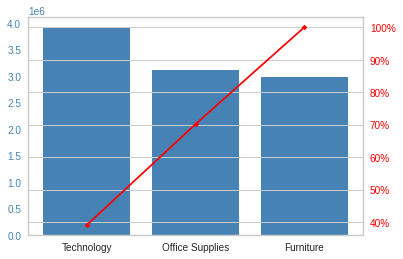

In [20]:
# define color for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_category_sales['category'], df_category_sales['sales'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_category_sales.index, df_category_sales['cumperc_sales'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

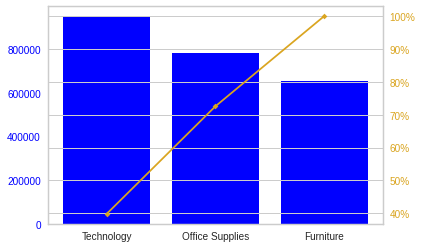

In [21]:
# define color for plot
color1 = 'blue'
color2 = 'goldenrod'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_category_profit['category'], df_category_profit['profit'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_category_profit.index, df_category_profit['cumperc_profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

**Interpretation:**

In the **Pareto Chart** that has been made, it is found that sales of goods in the **`Technology`** and **`Office Supplies`** categories contributed 70.16% to the sales obtained. While the two categories of goods have an influence of 72.55% on company profits. With the **Pareto Chart**, recommendations are obtained to further intensify sales campaigns for goods in the **`Technology`** and **`Office Supplies`** categories.

### **Sub-Category of Product**

In [22]:
df_subcategory = df_pareto.groupby(['sub_category'], as_index=False).agg({
        'sales': 'sum',
        'profit': 'sum'})

df_subcategory

,sub_category,sales,profit
0,Accessories,6.414648e+05,169483.8044
1,Appliances,8.417558e+05,205672.2798
2,Art,3.185448e+05,79614.5386
3,Binders,3.914699e+05,125333.9073
4,Bookcases,1.163329e+06,263370.7168
5,Chairs,1.098857e+06,236481.1644
6,Copiers,1.248927e+06,330115.0480
7,Envelopes,1.438776e+05,40464.6818
8,Fasteners,6.812137e+04,17798.7240
9,Furnishings,3.122562e+05,75481.9224


In [23]:
# cumulative percentage for category
df_subcategory_sales = df_subcategory.sort_values(by='sales', ascending=False).reset_index(drop = True)
df_subcategory_sales['cumperc_sales'] = df_subcategory_sales['sales'].cumsum()/df_subcategory_sales['sales'].sum()*100
print(df_subcategory_sales, '\n')

df_subcategory_profit = df_subcategory.sort_values(by='profit', ascending=False).reset_index(drop = True)
df_subcategory_profit['cumperc_profit'] = df_subcategory_profit['profit'].cumsum()/df_subcategory_profit['profit'].sum()*100
print(df_subcategory_profit, '\n')

   sub_category         sales       profit  cumperc_sales
0        Phones  1.441839e+06  313134.6659      14.418714
1       Copiers  1.248927e+06  330115.0480      26.908261
2     Bookcases  1.163329e+06  263370.7168      38.541807
3        Chairs  1.098857e+06  236481.1644      49.530616
4       Storage  8.681493e+05  184525.4678      58.212301
5    Appliances  8.417558e+05  205672.2798      66.630046
6   Accessories  6.414648e+05  169483.8044      73.044835
7      Machines  5.769858e+05  137540.6133      78.814821
8        Tables  4.093322e+05   80039.7599      82.908234
9       Binders  3.914699e+05  125333.9073      86.823020
10          Art  3.185448e+05   79614.5386      90.008539
11  Furnishings  3.122562e+05   75481.9224      93.131170
12        Paper  2.186483e+05   69507.1764      95.317701
13     Supplies  1.928337e+05   40767.6941      97.246081
14    Envelopes  1.438776e+05   40464.6818      98.684889
15    Fasteners  6.812137e+04   17798.7240      99.366118
16       Label

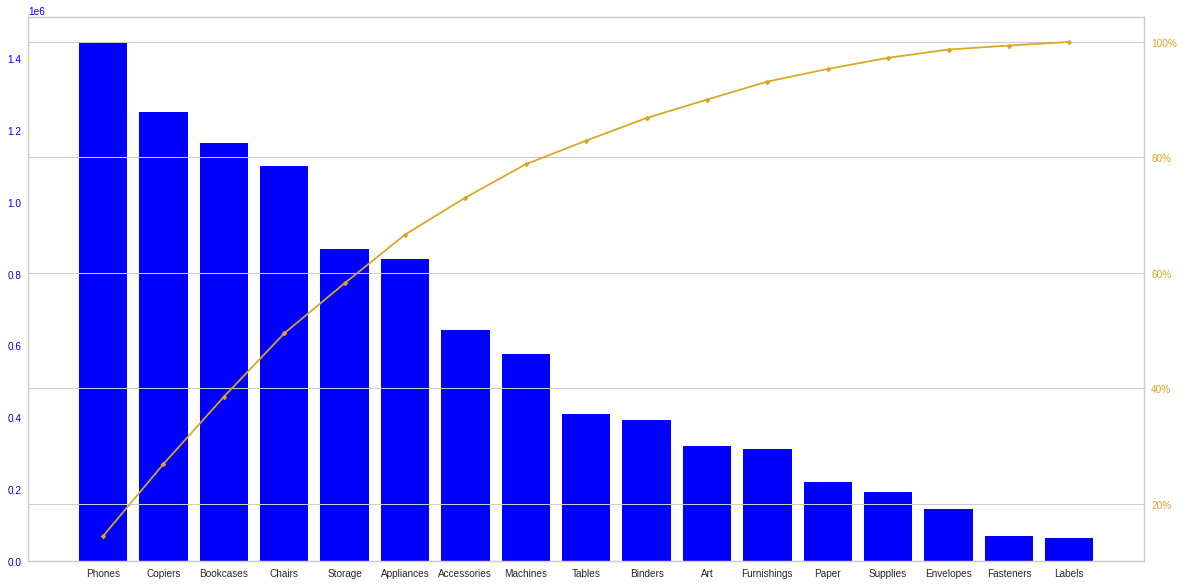

In [24]:
# define color for plot
color1 = 'blue'
color2 = 'goldenrod'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_subcategory_sales['sub_category'], df_subcategory_sales['sales'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_subcategory_sales.index, df_subcategory_sales['cumperc_sales'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

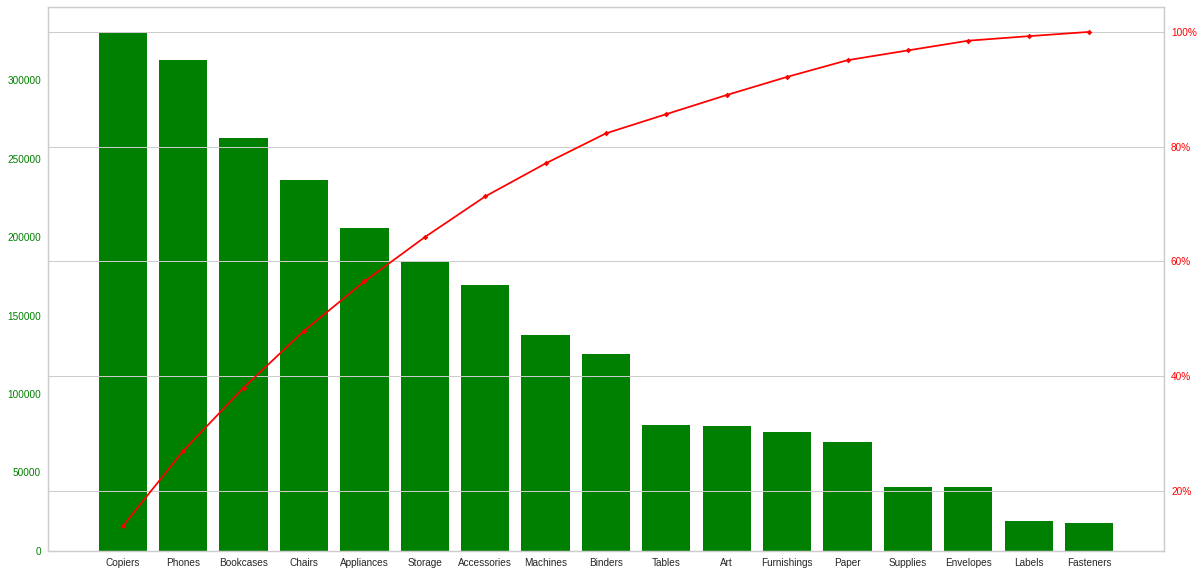

In [25]:
# define color for plot
color1 = 'green'
color2 = 'red'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_subcategory_profit['sub_category'], df_subcategory_profit['profit'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_subcategory_profit.index, df_subcategory_profit['cumperc_profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

**Interpretation:**

In the **Pareto Chart** for **Sub-Categories**, it was found that 9 **Sub-Categories** accounted for 80% of the company's sales. Among them are **`Phones`**, **`Copiers`**, **`Bookcases`**, **`Chairs`**, **`Storage`**, **`Appliances`**, **`Accessories`**, **`Machines`**, and **`Tables`**. However, in terms of company profits, the position of **`Tables`** was replaced with **`Binders`**.

### **Region on Sales and Profit**

In [26]:
df_region = df_pareto.groupby(['region'], as_index=False).agg({
        'sales': 'sum',
        'profit': 'sum'})

df_region

,region,sales,profit
0,Africa,7.039884e+05,177746.66400
1,Canada,6.553950e+04,17817.39000
2,Caribbean,2.459479e+05,58831.24592
3,Central,2.134739e+06,513600.34854
4,Central Asia,6.828869e+05,162048.23800
5,EMEA,6.637661e+05,166963.88400
6,East,5.092159e+05,141113.38750
7,North,1.058406e+06,246732.79248
8,North Asia,7.647201e+05,191133.22200
9,Oceania,7.996559e+05,176062.29600


In [27]:
# cumulative percentage for category
df_region_sales = df_region.sort_values(by='sales', ascending=False).reset_index(drop = True)
df_region_sales['cumperc_sales'] = df_region_sales['sales'].cumsum()/df_region_sales['sales'].sum()*100
print(df_region_sales, '\n')

df_region_profit = df_region.sort_values(by='profit', ascending=False).reset_index(drop = True)
df_region_profit['cumperc_profit'] = df_region_profit['profit'].cumsum()/df_region_profit['profit'].sum()*100
print(df_region_profit, '\n')

            region         sales        profit  cumperc_sales
0          Central  2.134739e+06  513600.34854      21.347867
1            South  1.208377e+06  297590.51136      33.431901
2            North  1.058406e+06  246732.79248      44.016201
3          Oceania  7.996559e+05  176062.29600      52.012936
4       North Asia  7.647201e+05  191133.22200      59.660307
5           Africa  7.039884e+05  177746.66400      66.700346
6     Central Asia  6.828869e+05  162048.23800      73.529366
7             EMEA  6.637661e+05  166963.88400      80.167174
8             West  6.417466e+05  131139.40980      86.584783
9   Southeast Asia  5.207887e+05  107324.05740      91.792785
10            East  5.092159e+05  141113.38750      96.885057
11       Caribbean  2.459479e+05   58831.24592      99.344590
12          Canada  6.553950e+04   17817.39000     100.000000 

            region         sales        profit  cumperc_profit
0          Central  2.134739e+06  513600.34854       21.506621
1   

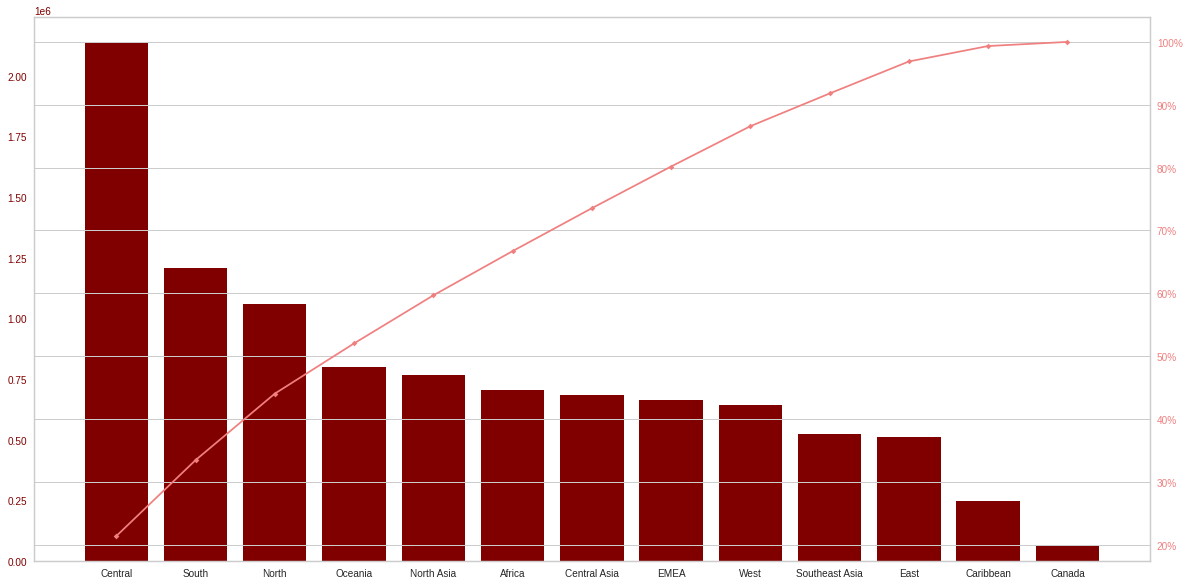

In [28]:
# define color for plot
color1 = 'maroon'
color2 = 'lightcoral'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_region_sales['region'], df_region_sales['sales'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_region_sales.index, df_region_sales['cumperc_sales'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

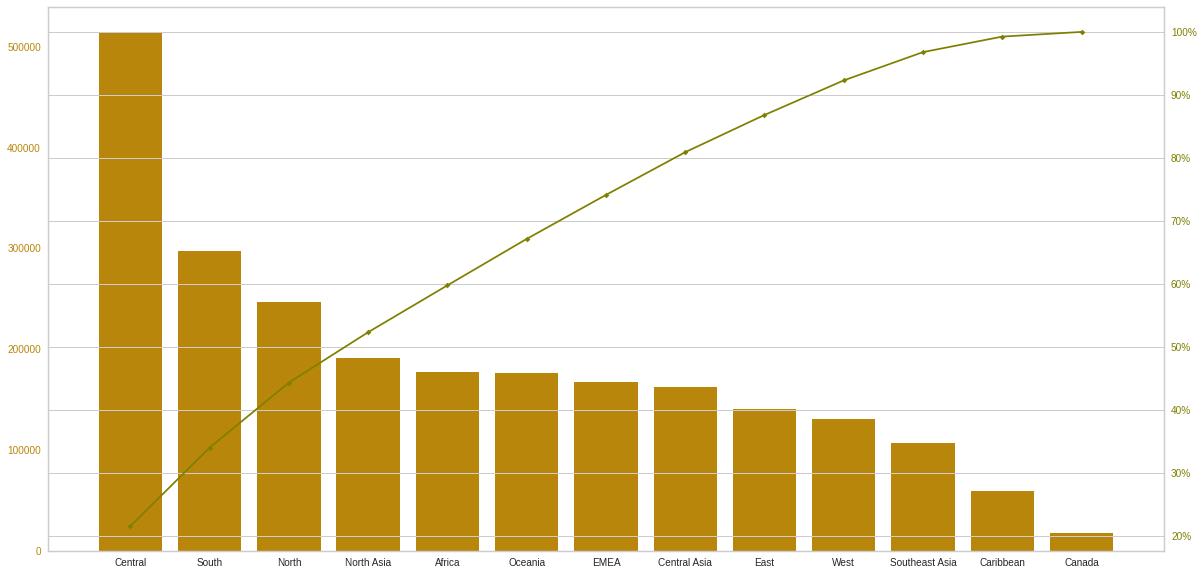

In [29]:
# define color for plot
color1 = 'darkgoldenrod'
color2 = 'olive'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_region_profit['region'], df_region_profit['profit'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_region_profit.index, df_region_profit['cumperc_profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

**Interpretation:**

In the **Pareto Chart** that has been made, it is found that there are **8 Regions** that account for 80% of the company's sales and profits. The **8 Regions** differ between sales and profits. The sales aspect consists of: **`Central`**, **`South`**, **`North`**, **`Oceania`**, **`North Asia`**, **`Africa`**, **`Central Asia`**, and **`EMEA (Europe, Middle East, and Africa)`**. While the profit aspect consists of: **`Central`**, **`South`**, **`North`**, **`North Asia`**, **`Africa`**, **`Oceania`**, **`EMEA (Europe, Middle East, and Africa)`**, and **`Central Asia`**.

### **City on Sales and Profit**

In [30]:
df_city = df_pareto.groupby(['city'], as_index=False).agg({
        'sales': 'sum',
        'profit': 'sum'})

df_city

,city,sales,profit
0,Aachen,3674.811,1116.981
1,Aalen,979.695,283.005
2,Aalst,387.330,152.310
3,Abadan,1354.950,233.820
4,Abbeville,85.800,19.710
...,...,...,...
3238,Zurich,10687.890,3054.120
3239,Zwedru,49.410,11.850
3240,Zwickau,99.030,19.380
3241,eMbalenhle,75.900,13.620


In [31]:
# cumulative percentage for category
df_city_sales = df_city.sort_values(by='sales', ascending=False).reset_index(drop = True)
df_city_sales['cumperc_sales'] = df_city_sales['sales'].cumsum()/df_city_sales['sales'].sum()*100
print(df_city_sales, '\n')

df_city_profit = df_city.sort_values(by='profit', ascending=False).reset_index(drop = True)
df_city_profit['cumperc_profit'] = df_city_profit['profit'].cumsum()/df_city_profit['profit'].sum()*100
print(df_city_profit, '\n')

                 city         sales       profit  cumperc_sales
0       New York City  234654.72900  66003.00630       2.346599
1         Los Angeles  160363.60600  31611.08790       3.950271
2             Seattle  113956.79000  29541.26760       5.089864
3       San Francisco   99342.63800  18849.15350       6.083312
4             Managua   79012.64408  17856.32408       6.873456
...               ...           ...          ...            ...
3238             Osny       4.56000      1.62000      99.999855
3239   Vanderbijlpark       4.53000      2.25000      99.999900
3240       Springdale       4.30000      1.41900      99.999943
3241  San Luis Obispo       3.62000      1.19460      99.999979
3242          Jupiter       2.06400      0.15480     100.000000

[3243 rows x 4 columns] 

                  city       sales      profit  cumperc_profit
0        New York City  234654.729  66003.0063        2.763825
1          Los Angeles  160363.606  31611.0879        4.087515
2              S

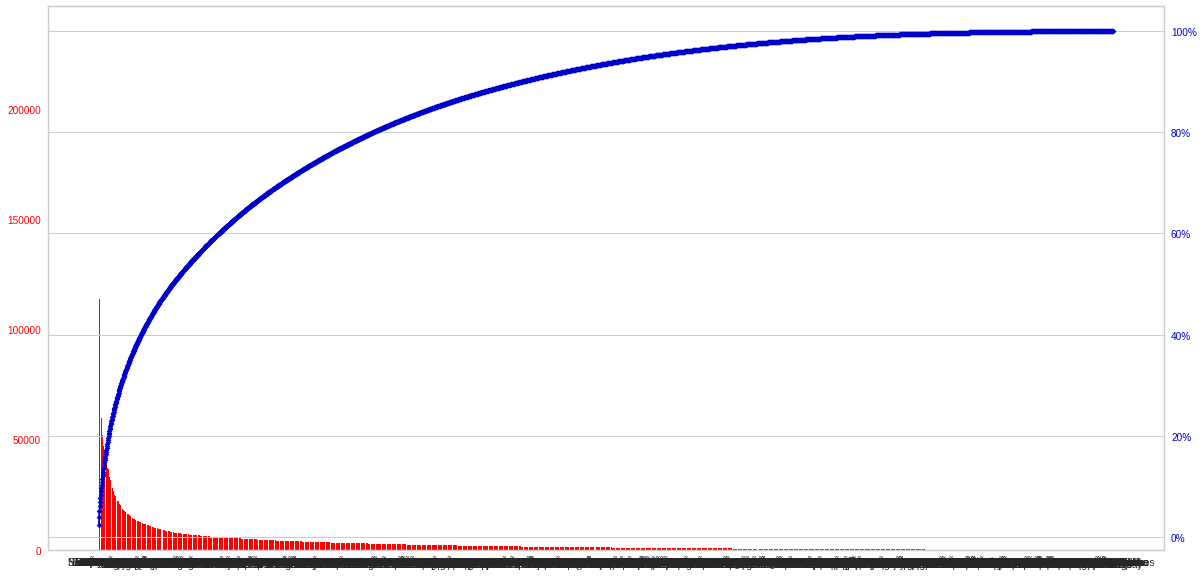

In [32]:
# define color for plot
color1 = 'red'
color2 = 'mediumblue'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_city_sales['city'], df_city_sales['sales'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_city_sales.index, df_city_sales['cumperc_sales'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

**Interpretation:**

As you can see, there are too many of the city. We only need to calculated into 80% of the total. We can assume that the accumulation of cities that account for 80% of sales is 30%, which is 973 cities. 

In [33]:
# check the 80%
df_city_sales.head(973)

,city,sales,profit,cumperc_sales
0,New York City,234654.72900,66003.00630,2.346599
1,Los Angeles,160363.60600,31611.08790,3.950271
2,Seattle,113956.79000,29541.26760,5.089864
3,San Francisco,99342.63800,18849.15350,6.083312
4,Managua,79012.64408,17856.32408,6.873456
...,...,...,...,...
968,Wadi as Sir,2502.57000,579.30000,82.433512
969,IbiÃºna,2501.98000,392.84000,82.458532
970,Leicester,2501.47800,740.59800,82.483548
971,Bokaro,2499.51000,1041.24000,82.508543


In [34]:
# the assumption isn't right
# try 27% of total cities
df_city_sales.head(878)

,city,sales,profit,cumperc_sales
0,New York City,234654.72900,66003.00630,2.346599
1,Los Angeles,160363.60600,31611.08790,3.950271
2,Seattle,113956.79000,29541.26760,5.089864
3,San Francisco,99342.63800,18849.15350,6.083312
4,Managua,79012.64408,17856.32408,6.873456
...,...,...,...,...
873,Hamm,2870.22600,656.94600,79.893238
874,Tarbes,2863.23750,473.64750,79.921871
875,Bunbury,2862.67500,278.62500,79.950499
876,Puteaux,2858.22300,1198.32300,79.979082


In [35]:
# try the same assumption to profit
df_city_profit.head(878)

,city,sales,profit,cumperc_profit
0,New York City,234654.729,66003.0063,2.763825
1,Los Angeles,160363.606,31611.0879,4.087515
2,Seattle,113956.790,29541.2676,5.324533
3,San Francisco,99342.638,18849.1535,6.113827
4,London,76457.736,18003.9360,6.867728
...,...,...,...,...
873,Xinshi,1562.580,657.9000,81.718591
874,Langenhagen,2692.581,657.5310,81.746125
875,Hamm,2870.226,656.9460,81.773634
876,Cadereyta,3246.960,655.2200,81.801071


In [36]:
# the same assumption did not match wit the profit
# try another
df_city_profit.head(815)

,city,sales,profit,cumperc_profit
0,New York City,234654.729,66003.0063,2.763825
1,Los Angeles,160363.606,31611.0879,4.087515
2,Seattle,113956.790,29541.2676,5.324533
3,San Francisco,99342.638,18849.1535,6.113827
4,London,76457.736,18003.9360,6.867728
...,...,...,...,...
810,IjuÃ­,1711.680,729.3800,79.902489
811,Huelva,1691.643,728.8530,79.933009
812,Birkenhead,2332.200,728.5500,79.963516
813,Tangshan,4719.780,728.2500,79.994011


**Interpretation:**

Based on the **Pareto Chart**, it was found that 878 cities accounted for 80% of sales of goods. While in the profit aspect, there are 815 cities that contribute 80% in this aspect.

### **Sales and Profits Affected by Discount in Categories and Sub-Categories**

In [37]:
# discount on category
df_cat_dis = df_pareto.groupby(['category'], as_index=False).agg({
        'discount': 'sum'})

# discount on sub-category
df_subcat_dis = df_pareto.groupby(['sub_category'], as_index=False).agg({
        'discount': 'sum'})

In [38]:
# cumulative percentage for category
df_cat_dis_cum = df_cat_dis.sort_values(by='discount', ascending=False).reset_index(drop = True)
df_cat_dis_cum['cumperc_cat_dis'] = df_cat_dis_cum['discount'].cumsum()/df_cat_dis_cum['discount'].sum()*100
print(df_cat_dis_cum, '\n')

df_subcat_dis_cum = df_subcat_dis.sort_values(by='discount', ascending=False).reset_index(drop = True)
df_subcat_dis_cum['cumperc_subcat_dis'] = df_subcat_dis_cum['discount'].cumsum()/df_subcat_dis_cum['discount'].sum()*100
print(df_subcat_dis_cum, '\n')

          category  discount  cumperc_cat_dis
0  Office Supplies   895.980        54.316500
1        Furniture   401.770        78.672781
2       Technology   351.804       100.000000 

   sub_category  discount  cumperc_subcat_dis
0       Binders   186.540           11.308511
1        Chairs   166.540           21.404574
2       Storage   164.750           31.392122
3        Phones   161.610           41.189315
4         Paper   141.310           49.755873
5   Furnishings   114.920           56.722605
6           Art   113.230           63.586885
7   Accessories    85.600           68.776166
8     Bookcases    84.690           73.910281
9        Labels    68.230           78.046551
10   Appliances    63.710           81.908807
11      Copiers    59.974           85.544578
12    Envelopes    58.410           89.085535
13    Fasteners    56.080           92.485241
14     Machines    44.620           95.190215
15     Supplies    43.720           97.840628
16       Tables    35.620       

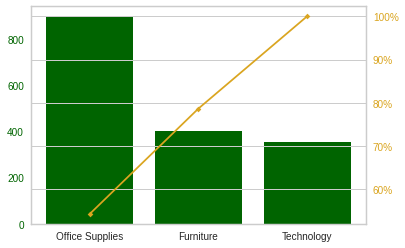

In [39]:
# define color for plot
color1 = 'darkgreen'
color2 = 'goldenrod'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_cat_dis_cum['category'], df_cat_dis_cum['discount'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_cat_dis_cum.index, df_cat_dis_cum['cumperc_cat_dis'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

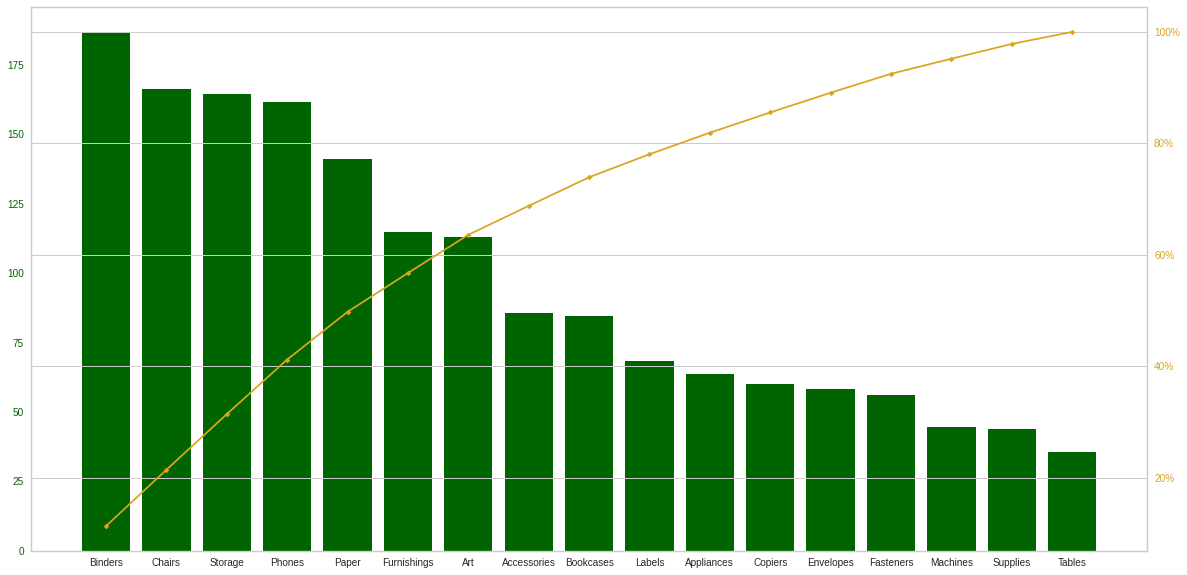

In [40]:
# define color for plot
color1 = 'darkgreen'
color2 = 'goldenrod'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_subcat_dis_cum['sub_category'], df_subcat_dis_cum['discount'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_subcat_dis_cum.index, df_subcat_dis_cum['cumperc_subcat_dis'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

Based on the **Pareto Chart**, it was found that all categories of products contributed 80% of sales and profits from the discounts given. Meanwhile, in the sub-category, 11 sub-category products contributed 80% of sales with discounts.

### **Country on Sales and Profit**

In [41]:
df_country = df_pareto.groupby(['country'], as_index=False).agg({
        'sales': 'sum',
        'profit': 'sum'})

df_country

,country,sales,profit
0,Afghanistan,21673.32000,5460.30000
1,Albania,3859.89000,709.32000
2,Algeria,35927.04000,9106.50000
3,Angola,24832.44000,6494.97000
4,Argentina,10743.55280,781.85280
...,...,...,...
128,Uruguay,7736.64000,2100.56000
129,Uzbekistan,7235.07000,1648.14000
130,Venezuela,3573.08052,289.22052
131,Vietnam,39404.96040,7108.85040


In [42]:
# cumulative percentage for category
df_country_sales = df_country.sort_values(by='sales', ascending=False).reset_index(drop = True)
df_country_sales['cumperc_sales'] = df_country_sales['sales'].cumsum()/df_country_sales['sales'].sum()*100
print(df_country_sales, '\n')

df_country_profit = df_country.sort_values(by='profit', ascending=False).reset_index(drop = True)
df_country_profit['cumperc_profit'] = df_country_profit['profit'].cumsum()/df_country_profit['profit'].sum()*100
print(df_country_profit, '\n')

               country         sales       profit  cumperc_sales
0        United States  1.800807e+06  442528.3074      18.008467
1            Australia  6.693340e+05  144815.1840      24.701955
2                China  6.520996e+05  161059.3560      31.223095
3               France  6.318085e+05  142904.8935      37.541320
4                India  5.671105e+05  133989.7200      43.212550
..                 ...           ...          ...            ...
128            Burundi  2.677200e+02     103.0800      99.992953
129          Macedonia  2.096400e+02      43.3800      99.995050
130            Eritrea  1.877400e+02      76.2000      99.996927
131            Armenia  1.567500e+02      69.0900      99.998495
132  Equatorial Guinea  1.505100e+02      44.4600     100.000000

[133 rows x 4 columns] 

               country         sales       profit  cumperc_profit
0        United States  1.800807e+06  442528.3074       18.530533
1                China  6.520996e+05  161059.3560       25.274

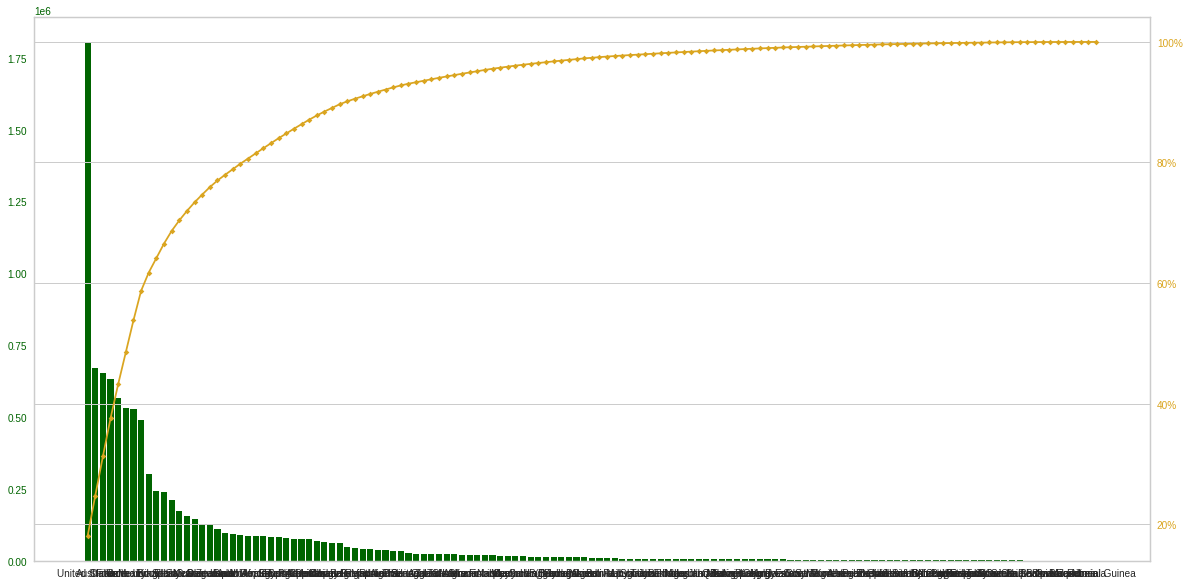

In [43]:
# define color for plot
color1 = 'darkgreen'
color2 = 'goldenrod'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_country_sales['country'], df_country_sales['sales'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_country_sales.index, df_country_sales['cumperc_sales'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

In [44]:
df_country_sales.head(30)

,country,sales,profit,cumperc_sales
0,United States,1.800807e+06,442528.30740,18.008467
1,Australia,6.693340e+05,144815.18400,24.701955
2,China,6.520996e+05,161059.35600,31.223095
3,France,6.318085e+05,142904.89350,37.541320
4,India,5.671105e+05,133989.72000,43.212550
5,Germany,5.304652e+05,128513.33550,48.517319
6,Mexico,5.274611e+05,115150.38648,53.792047
7,United Kingdom,4.905437e+05,122508.90600,58.697593
8,Brazil,3.032219e+05,72163.58260,61.729879
9,Indonesia,2.412052e+05,50118.80100,64.141984


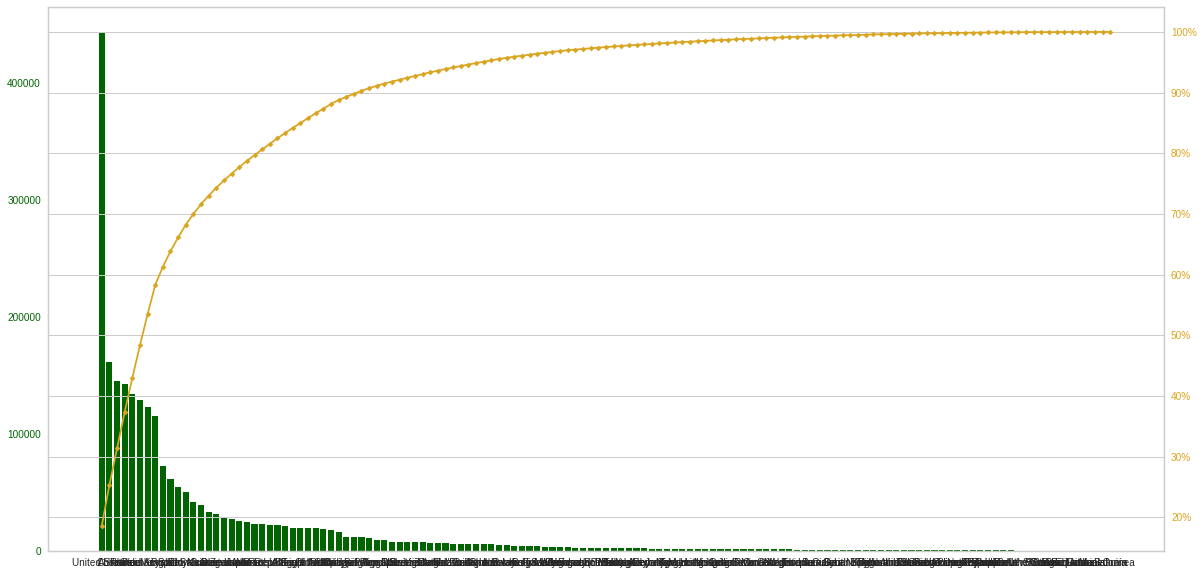

In [45]:
# define color for plot
color1 = 'darkgreen'
color2 = 'goldenrod'
line_size = 4

# create basic bar plot
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_country_profit['country'], df_country_profit['profit'], color=color1)
ax.grid(False)

# add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_country_profit.index, df_country_profit['cumperc_profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# display Pareto chart
plt.show()

In [46]:
df_country_profit.head(30)

,country,sales,profit,cumperc_profit
0,United States,1.800807e+06,442528.30740,18.530533
1,China,6.520996e+05,161059.35600,25.274770
2,Australia,6.693340e+05,144815.18400,31.338795
3,France,6.318085e+05,142904.89350,37.322828
4,India,5.671105e+05,133989.72000,42.933545
5,Germany,5.304652e+05,128513.33550,48.314942
6,United Kingdom,4.905437e+05,122508.90600,53.444909
7,Mexico,5.274611e+05,115150.38648,58.266743
8,Brazil,3.032219e+05,72163.58260,61.288537
9,Spain,2.392592e+05,61187.44800,63.850715


**Interpretation:**

In the **Pareto Chart**, it is found that sales and profits from 22 countries have fulfilled 80% of sales and profits. This is considered quite good because it is only **16% of the market** owned by the company.

## **Grouping**

In [47]:
# filter the country value based on Pareto Chart
prepared_data = df.query('country in ["United States","Australia","China","France","India","Germany","Mexico","United Kingdom","Brazil","Indonesia","Spain","Italia","El Salvador","Cuba","Nicaragua","New Zealand","New Zealand","Guatemala","Iran","Japan","Austria","South Africa","Morocco","Russia"]')

In [48]:
prepared_data['country'].value_counts()

United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Spain              859
El Salvador        736
Cuba               724
New Zealand        628
Nicaragua          614
Iran               607
Guatemala          521
South Africa       461
Morocco            451
Russia             384
Austria            331
Japan              250
Name: country, dtype: int64

In [49]:
# check the shape of data
prepared_data.shape

(34990, 24)

In [50]:
prepared2_data = prepared_data[['order_id', 'customer_id', 'order_date', 'GMV']]

In [51]:
# create a new dataset as 'data_for_model'
data_for_model = prepared2_data.groupby(['customer_id'], as_index=False).agg({
        'order_date': lambda x: (date_baseline - x.max()).days,
        'order_id': 'count',
        'GMV': 'sum'})

In [52]:
# rename the columns name of new data
data_for_model.rename(columns={'order_date': 'Recency',
                      'order_id': 'Frequency',
                      'GMV': 'Monetary'}, inplace=True)

In [53]:
# filtering the new data
data_for_model = data_for_model[data_for_model['Monetary'] > 0]

In [54]:
# check the data
data_for_model

,customer_id,Recency,Frequency,Monetary
0,AA-10315,8,36,52195.73500
1,AA-10375,6,25,14573.55500
2,AA-10480,258,33,58236.01854
3,AA-10645,28,55,67753.88342
4,AA-315,491,1,5019.84000
...,...,...,...,...
1368,YS-11880,764,5,1044.72000
1369,YS-21880,9,46,90517.13000
1370,ZC-21910,3,70,130347.49378
1371,ZD-11925,415,3,855.45000


# **Open Ended**

## **RFM Analysis**

In [55]:
quantiles_recency = data_for_model.quantile(q = [0.25,0.50,0.75])
quantiles_recency

,Recency,Frequency,Monetary
0.25,19.0,3.0,1130.4600
0.50,50.0,29.0,30776.7613
0.75,259.0,43.0,57779.4291


In [56]:
quantiles_recency = data_for_model.quantile(q = [0.25,0.50,0.75])


# Membuat fungsi untuk menentukan nilai RFM:
def R_score(data):
    if data < quantiles_recency['Recency'][0.25]:
        return 4
    elif data < quantiles_recency['Recency'][0.50]:
        return 3
    elif data < quantiles_recency['Recency'][0.75]:
        return 2    
    else:
        return 1
    
def F_score(data):
    if data < quantiles_recency['Frequency'][0.25]:
        return 1
    elif data < quantiles_recency['Frequency'][0.50]:
        return 2
    elif data < quantiles_recency['Frequency'][0.75]:
        return 3    
    else:
        return 4    
    
    
def M_score(data):
    if data < quantiles_recency['Monetary'][0.25]:
        return 1
    elif data < quantiles_recency['Monetary'][0.50]:
        return 2
    elif data < quantiles_recency['Monetary'][0.75]:
        return 3    
    else:
        return 4

In [57]:
data_for_model['R_score'] = data_for_model.Recency.apply(lambda x : R_score(x))
data_for_model['F_score'] = data_for_model.Frequency.apply(lambda x : F_score(x))
data_for_model['M_score'] = data_for_model.Monetary.apply(lambda x : M_score(x))
data_for_model['RFM_Score'] = data_for_model['R_score'].map(str) + data_for_model['F_score'].map(str) + data_for_model['M_score'].map(str) 

In [58]:
data_for_model.head()

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,AA-10315,8,36,52195.73500,4,3,3,433
1,AA-10375,6,25,14573.55500,4,2,2,422
2,AA-10480,258,33,58236.01854,2,3,4,234
3,AA-10645,28,55,67753.88342,3,4,4,344
4,AA-315,491,1,5019.84000,1,1,2,112


In [59]:
# Change rfm score data type into integer for further analysis
data_for_model['RFM_Score'] = data_for_model['RFM_Score'].astype('int')

In [60]:
data_for_model['RFM_Score'].value_counts()

111    161
344    103
444     92
222     82
122     80
433     75
121     66
333     65
233     53
343     50
211     49
334     45
443     43
322     38
244     38
221     36
434     35
112     31
422     26
234     21
432     20
243     16
332     16
212     15
232     15
423     14
323     14
311     12
223     10
321      8
411      8
442      5
224      5
324      4
242      4
342      3
412      3
421      3
132      3
312      2
424      1
123      1
133      1
113      1
Name: RFM_Score, dtype: int64

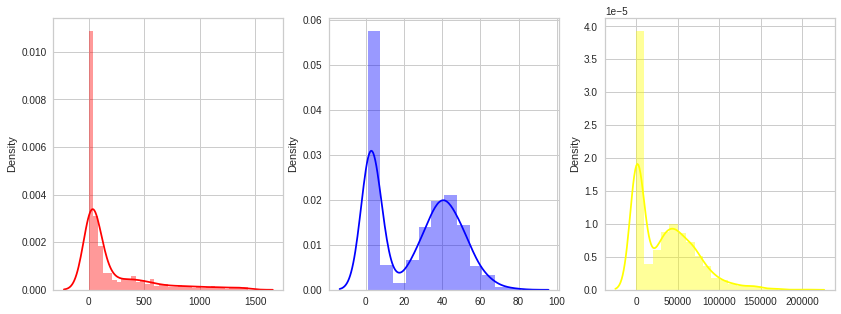

In [61]:
plt.figure(figsize = (14,5))

plt.subplot(1,3, 1)
sns.distplot(x = data_for_model['Recency'], kde = True, color = 'red')

plt.subplot(1,3,2)
sns.distplot(x = data_for_model['Frequency'], kde = True, color = 'blue')

plt.subplot(1,3,3)
sns.distplot(x = data_for_model['Monetary'], kde = True, color = 'yellow')

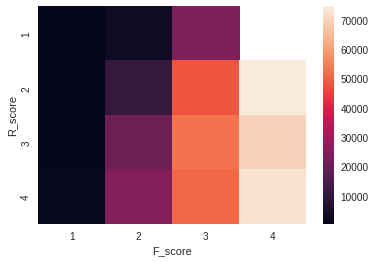

In [62]:
# Heatmap visualization
sns.heatmap(
    pd.pivot_table(data_for_model[["R_score", "F_score","Monetary"]], values = "Monetary", index = ["R_score"], columns = ["F_score"])
)

**Interpretation:**

The heat map describes the amount of spending for customers, the brighter the spending and also the higher R the better the rank, the lower F the lower the R the lower the value.

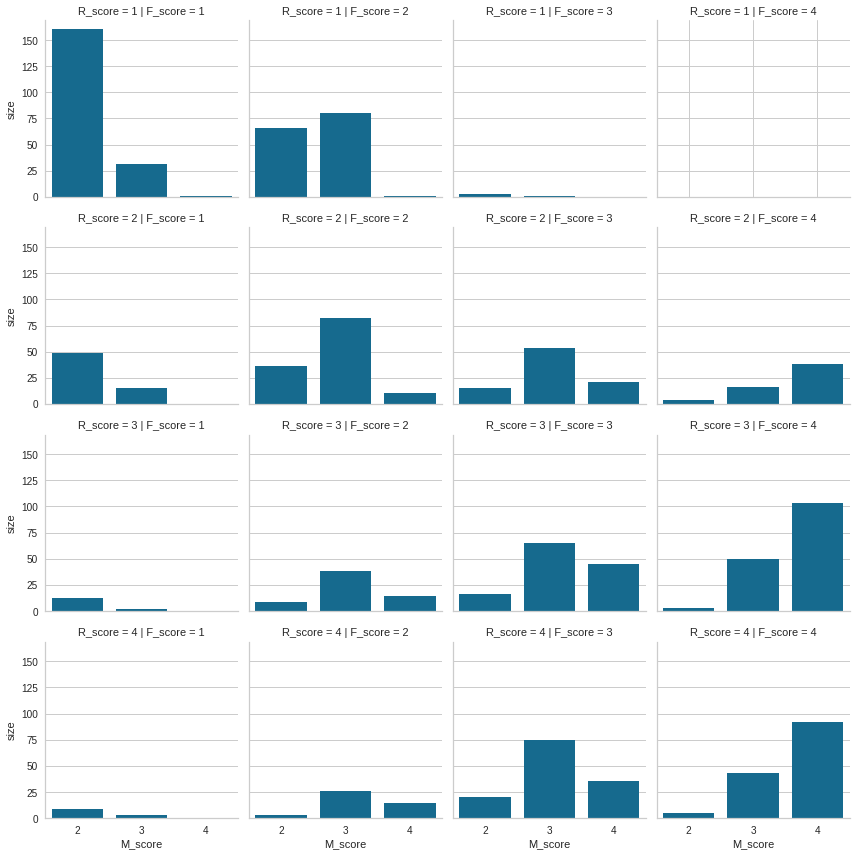

In [63]:
# RFM Distribution
RFM_data = data_for_model[["R_score", "F_score", "M_score"]].groupby(["R_score","F_score","M_score"], as_index = False).size()

g = sns.FacetGrid(
    data = RFM_data,
    col = "F_score",
    row = "R_score"
)
g.map(sns.barplot, "M_score", "size");

**Interpretation:**

From the graph above, quite a lot of R3, F3 and M3, and there isn't R1, F1, and M1 which is a customers who spend a lot and rarely make transactions and rarely visit.

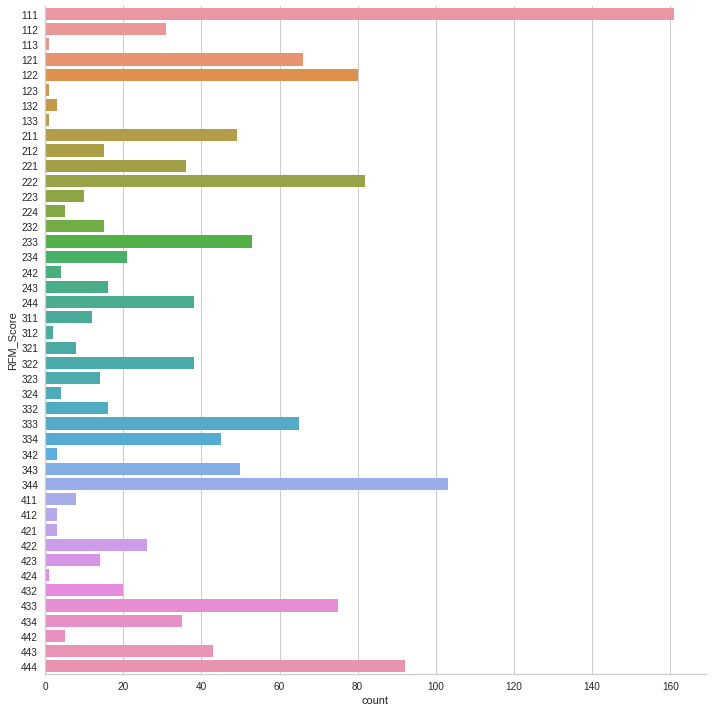

In [64]:
# RFM score to RFM segment
sns.catplot(
    y = "RFM_Score", 
    data = data_for_model.sort_values(by = ["RFM_Score"], axis = 0), 
    kind = "count", 
    height = 10
)

For the segmentation we tried to divide the customer to four segmentations :


*   Loyal : customer with highest rfm score 444 point.
*   Champion : customer two 4 point rfm score, these customer have highest possibility to turn into champion customer which is valuable asset for company.
*   Average : customer considered as normal customer with average score, which is have at least double 3 score or combined 3 & 4 score each 1.
*   At Risk : customer with double 1, 2, or both point RFM Score and without any of 4 on their RFM, for this customer the company must handle this seriously so didn't turn to lost customers.
*   Ghost or Lost : these customer with the lowest RFM Score, so the company must take out these customers from any marketing and promotion consideration.

In [66]:
data_for_model['RFM_Segment'] = np.select(
    [
     data_for_model['RFM_Score'].isin([444]),
     data_for_model['RFM_Score'].isin([344, 434, 443, 414, 424, 441, 442]),
     data_for_model['RFM_Score'].isin([313, 314, 333, 334, 343, 433, 323, 324, 331, 332, 341, 342, 413, 423, 431, 432, 133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['RFM_Score'].isin([121, 131, 141, 211, 311, 411, 221, 222, 223, 224, 232, 231, 241, 242, 312, 321, 322, 412, 422, 421, 122, 123, 124, 132, 142, 212, 213, 214]),
     data_for_model['RFM_Score'].isin([111, 113, 114, 112])
    ],
    [
     'Loyal',
     'Champion',
     'Average',
     'At Risk',
     'Ghost or Lost'
    ]
)

data_for_model.head(10)

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Segment
0,AA-10315,8,36,52195.73500,4,3,3,433,Average
1,AA-10375,6,25,14573.55500,4,2,2,422,At Risk
2,AA-10480,258,33,58236.01854,2,3,4,234,Average
3,AA-10645,28,55,67753.88342,3,4,4,344,Champion
4,AA-315,491,1,5019.84000,1,1,2,112,Ghost or Lost
5,AA-645,439,2,145.95000,1,1,1,111,Ghost or Lost
6,AB-10015,16,57,70753.56680,4,4,4,444,Loyal
7,AB-10060,54,38,66918.95090,2,3,4,234,Average
8,AB-10105,41,46,171318.49400,3,4,4,344,Champion
9,AB-10150,41,39,73398.03620,3,3,4,334,Average


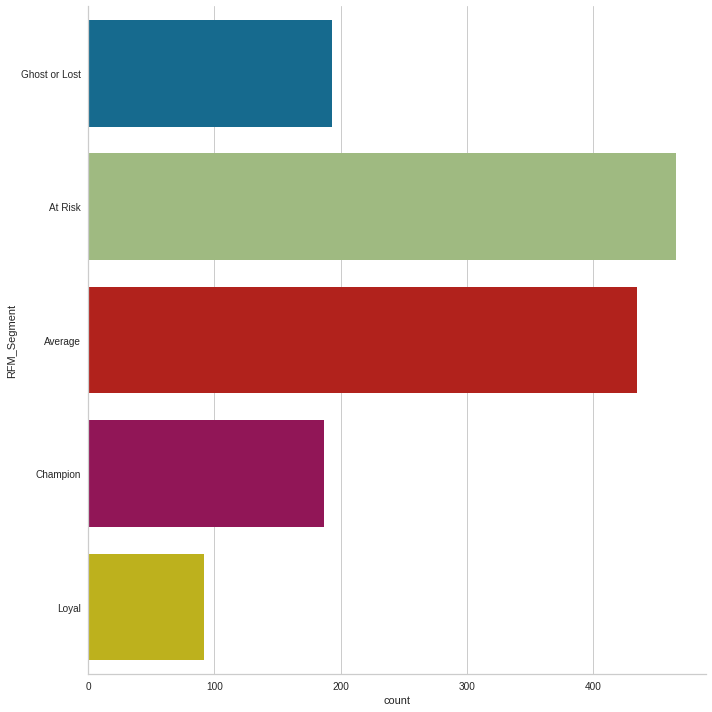

In [67]:
# RFM segmentation distribution
sns.catplot(
    y = "RFM_Segment", 
    data = data_for_model.sort_values(by = ["RFM_Score"], axis = 0), 
    kind = "count", 
    height = 10
);

In [70]:
# checking the ghost or lost customer
data_for_model[data_for_model.RFM_Segment == 'Ghost or Lost'].tail(10)

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Segment
1262,SW-10755,856,1,16.68,1,1,1,111,Ghost or Lost
1273,TB-11280,707,2,47.28,1,1,1,111,Ghost or Lost
1287,TC-10980,1077,2,99.00,1,1,1,111,Ghost or Lost
1300,TH-11115,680,1,5097.60,1,1,2,112,Ghost or Lost
1312,TP-11565,686,1,196.92,1,1,1,111,Ghost or Lost
1320,TS-11205,917,1,8.73,1,1,1,111,Ghost or Lost
1323,TS-11505,1351,2,23.52,1,1,1,111,Ghost or Lost
1336,TT-11460,629,1,89.88,1,1,1,111,Ghost or Lost
1343,TZ-11580,467,2,58.80,1,1,1,111,Ghost or Lost
1348,VD-11670,1192,2,345.96,1,1,1,111,Ghost or Lost


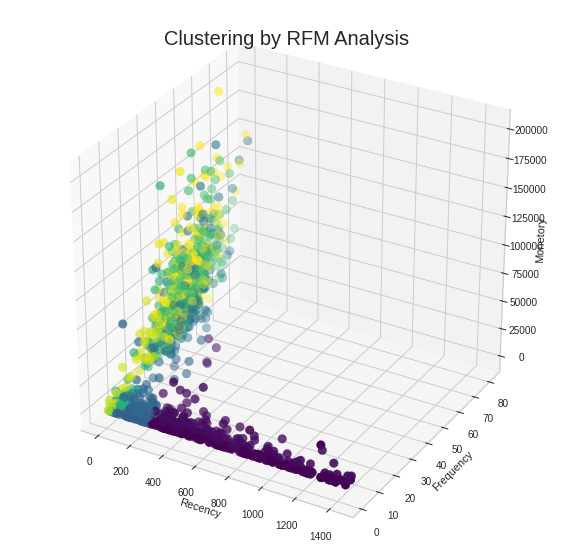

In [148]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(data_for_model["Recency"],data_for_model["Frequency"],data_for_model["Monetary"],
               c = data_for_model['RFM_Score'], cmap ="viridis",s = 75) 

plt.title('Clustering by RFM Analysis',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

## **K-Means**

**Standard Scaler**

In [71]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 1372
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1373 non-null   object 
 1   Recency      1373 non-null   int64  
 2   Frequency    1373 non-null   int64  
 3   Monetary     1373 non-null   float64
 4   R_score      1373 non-null   int64  
 5   F_score      1373 non-null   int64  
 6   M_score      1373 non-null   int64  
 7   RFM_Score    1373 non-null   int64  
 8   RFM_Segment  1373 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 107.3+ KB


In [74]:
scaler_obj = StandardScaler()
scaled_data = scaler_obj.fit_transform(data_for_model[["Recency", "Frequency", "Monetary"]].to_numpy())
data_for_kmeans = pd.DataFrame(scaled_data, columns = ["Recency", "Frequency", "Monetary"])

In [93]:
data_for_kmeans.describe().round(3)

,Recency,Frequency,Monetary
count,1373.000,1373.000,1373.000
mean,-0.000,0.000,-0.000
std,1.000,1.000,1.000
min,-0.654,-1.188,-0.991
25%,-0.593,-1.091,-0.959
50%,-0.495,0.171,-0.114
75%,0.169,0.850,0.655
max,3.908,2.693,4.755


**K-Means**

In [98]:
kmeans_model = KMeans(
    n_clusters = 5,
    random_state=1000
)

kmeans_model.fit(data_for_kmeans)

KMeans(n_clusters=5, random_state=1000)

In [99]:
np.unique(kmeans_model.labels_, return_counts = True)

(array([0, 1, 2, 3, 4], dtype=int32), array([520, 283, 106, 258, 206]))

In [100]:
data_for_model["cluster"] = kmeans_model.labels_

### **Post Analysis Modeling**

In [101]:
data_for_model

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Segment,cluster
0,AA-10315,8,36,52195.73500,4,3,3,433,Average,0
1,AA-10375,6,25,14573.55500,4,2,2,422,At Risk,0
2,AA-10480,258,33,58236.01854,2,3,4,234,Average,0
3,AA-10645,28,55,67753.88342,3,4,4,344,Champion,3
4,AA-315,491,1,5019.84000,1,1,2,112,Ghost or Lost,4
...,...,...,...,...,...,...,...,...,...,...
1368,YS-11880,764,5,1044.72000,1,2,1,121,At Risk,4
1369,YS-21880,9,46,90517.13000,4,4,4,444,Loyal,3
1370,ZC-21910,3,70,130347.49378,4,4,4,444,Loyal,3
1371,ZD-11925,415,3,855.45000,1,2,1,121,At Risk,4


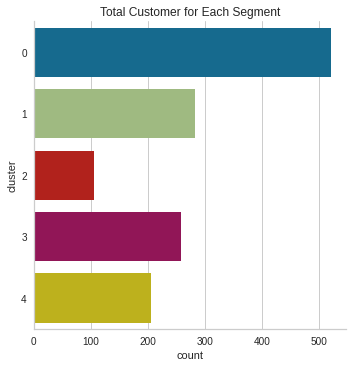

In [103]:
sns.catplot(
    y = "cluster", 
    data = data_for_model, 
    kind = "count", 
    height = 5
).ax.set_title("Total Customer for Each Segment");

### **Cluster Evaluation**

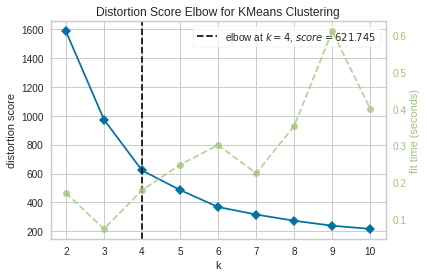

In [105]:
# elbow methods
model = KElbowVisualizer(KMeans(random_state=1000), k=10)
model.fit(data_for_kmeans)
model.show()

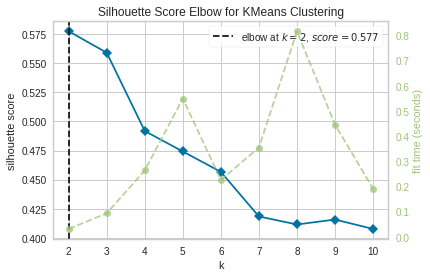

In [106]:
# silhouette method
model = KElbowVisualizer(KMeans(random_state=1000), k=10, metric = "silhouette")
model.fit(data_for_kmeans)
model.show()

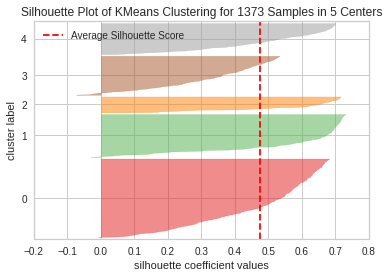

In [107]:
# silhouette visualization
visualizer = SilhouetteVisualizer(kmeans_model, is_fitted = True)
visualizer.fit(data_for_kmeans)
visualizer.show();

### **Dimensional Reduction using PCA**

In [108]:
# pca modeling
pca_model = PCA()
pca_model.fit(data_for_kmeans)
pca_result = pca_model.transform(data_for_kmeans)
pca_model.explained_variance_ratio_

array([0.772611  , 0.18044821, 0.04694079])

In [109]:
pca_result

array([[ 0.93278596, -0.17347749,  0.02853442],
       [-0.03346569, -0.80918247, -0.28146621],
       [ 0.53917409,  0.54210458,  0.14889767],
       ...,
       [ 3.28916957,  1.2637005 ,  0.27521488],
       [-1.59117403, -0.16308032,  0.08699877],
       [-0.03289169, -0.79747914, -0.08056526]])

In [110]:
pca_result = pd.DataFrame(pca_result, columns = ["PC1", "PC2", "PC3"])
pca_result['cluster'] = kmeans_model.labels_

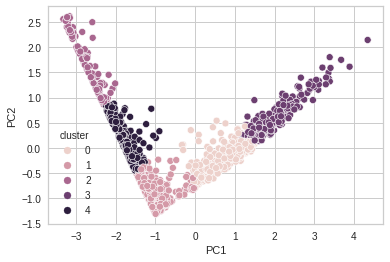

In [111]:
sns.scatterplot(data = pca_result, x = "PC1", y = "PC2", hue = "cluster");

In [118]:
centroids = kmeans_model.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
colors = ['#DF2020', '#81DF20', '#2095DF','#BFDF20','#20DFB9']
pca_result['c'] = pca_result.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

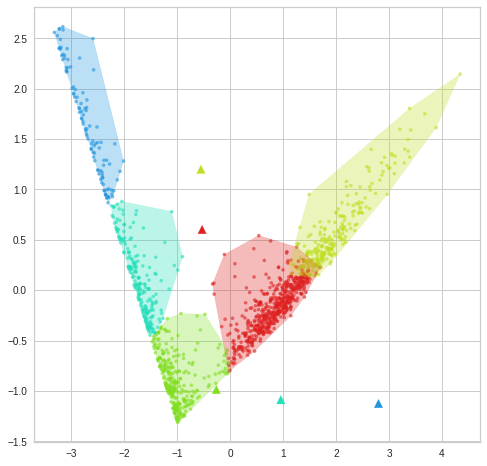

In [119]:
fig, ax = plt.subplots(1, figsize=(8,8))

plt.scatter(pca_result.PC1, pca_result.PC2, c=pca_result.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

# draw enclosure
for i in pca_result.cluster.unique():
    points = pca_result[pca_result.cluster == i][['PC1', 'PC2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

In [120]:
# biplot

def myplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

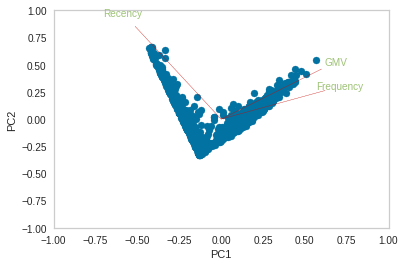

In [121]:
pca_model = PCA()
pca_model.fit(data_for_kmeans)
pca_result = pca_model.transform(data_for_kmeans)
myplot(pca_result[:,0:3], np.transpose(pca_model.components_[0:3, :]), labels = ["Recency", "Frequency", "GMV"])
plt.show()

In [122]:
pca_result[:,0:3]
pca_model.components_[0:2, :]

array([[-0.51168628,  0.6181372 ,  0.59672736],
       [ 0.84971968,  0.26134329,  0.45790408]])

### **New K-Means Model**

In [139]:
model1 = KMeans(n_clusters = 4, max_iter = 400, random_state = 42)
model1.fit(data_for_kmeans)
data_for_kmeans['labels'] = model1.labels_

In [140]:
kmeans_score = metrics.silhouette_score(data_for_kmeans[['Recency','Frequency','Monetary']], model1.labels_, metric='euclidean')
c1 = metrics.calinski_harabasz_score(data_for_kmeans[['Recency','Frequency','Monetary']], model1.labels_)

## **DBSCAN**

In [124]:
data_for_dbscan = len(data_for_kmeans.columns)*2
print('Minimum Points Considered are:', data_for_dbscan)

Minimum Points Considered are: 6


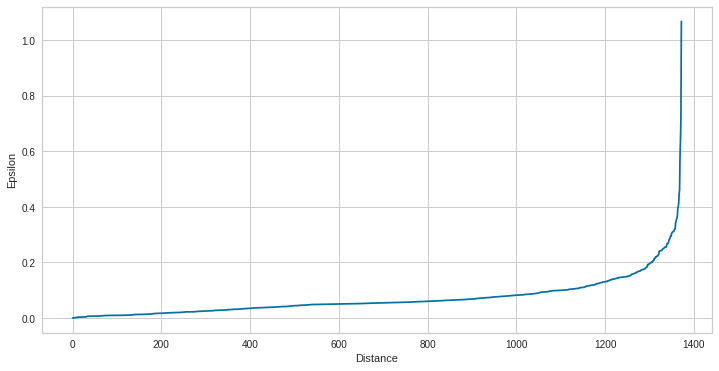

In [125]:
# looking for mean of distance with knn
neighbours = NearestNeighbors(n_neighbors = data_for_dbscan)
knn_data = neighbours.fit(data_for_kmeans)

# getting index and distance
distances, indices = knn_data.kneighbors(data_for_kmeans)

# sort the distance
sorting_distance = np.sort(distances, axis = 0)

# order of distance
sorted_distance = sorting_distance[:,1]

# plotting between epsilon and distance
plt.figure(figsize = (12,6))
plt.plot(sorted_distance)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

**Interpretation:**

The ideal value for will be equal to the value of the distance at the "crook of the elbow", or the point of maximum curvature. Enlarging the k-distance plot, it is seen that the optimal value for is around 0.2 to 0.4. We ended up repeating the combination of data_for_dbscan values and slightly above and below the estimated values here to find the most suitable model.

In [127]:
# dbscan algorithm 
dbscan_data = data_for_kmeans[['Recency','Frequency','Monetary']]
x1 = dbscan_data
dbscan_model = DBSCAN(eps = 0.3, min_samples = data_for_dbscan).fit(x1)
dbscan_data['labels'] = dbscan_model.labels_
print('The Number of Clusters Obtained will be :')
print(dbscan_data['labels'].value_counts())

# silhoutte score
score = metrics.silhouette_score(x1, dbscan_model.labels_)
print("Silhoutte score:", score)

The Number of Clusters Obtained will be :
 0    1313
-1      49
 1       8
 2       3
Name: labels, dtype: int64
Silhoutte score: 0.2817192275018668


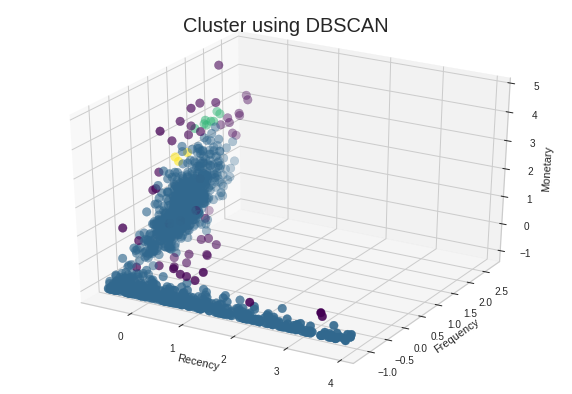

In [128]:
#plotting :
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(dbscan_data["Recency"],dbscan_data["Frequency"],dbscan_data["Monetary"],
               c = dbscan_data["labels"] , cmap ="viridis",s = 75)       
plt.title('Cluster using DBSCAN',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.show()

In [141]:
dbscan_score = metrics.silhouette_score(dbscan_data[['Recency','Frequency','Monetary']], dbscan_model.labels_, metric='euclidean')
c2 = metrics.calinski_harabasz_score(dbscan_data[['Recency','Frequency','Monetary']], dbscan_model.labels_)

## **Agglomerative Clustering Hierarchy**

In [129]:
data_for_agglo = data_for_kmeans[['Recency','Frequency','Monetary']]
data_for_agglo.head()

,Recency,Frequency,Monetary
0,-0.628328,0.510098,0.495986
1,-0.634681,-0.023495,-0.575975
2,0.165825,0.364573,0.668091
3,-0.564795,1.431759,0.939281
4,0.905974,-1.187698,-0.848188


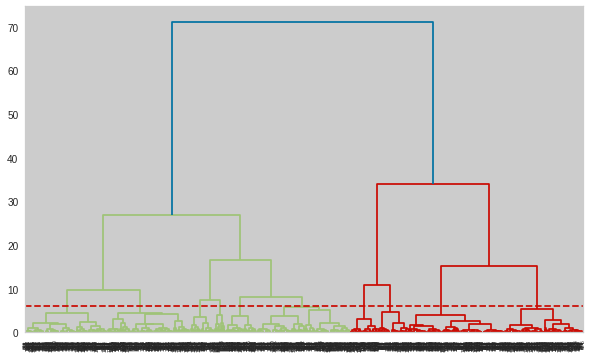

In [131]:
plt.figure(figsize = (10,6))
shc.dendrogram(shc.linkage(data_for_agglo, method='ward'))
plt.axhline(y = 6, color='r', linestyle='--')
plt.show()

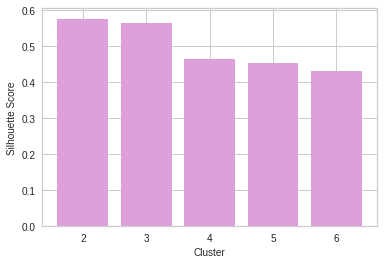

In [133]:
#validation
agglo_s_score = []
x1 = data_for_agglo[['Recency','Frequency','Monetary']]

for n_cluster in range(2,7):
    agglo_s_score.append(metrics.silhouette_score(x1, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(x1))) 
    
    
k = [2, 3, 4, 5, 6] 
plt.bar(k,agglo_s_score, color = 'plum' ) 
plt.xlabel('Cluster', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

**Interpretation:**

Based on those visualization, we will choose 4 cluster.

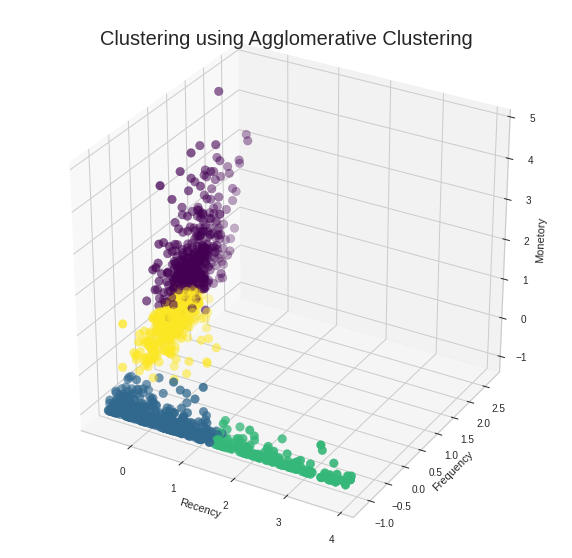

In [134]:
x2 = data_for_agglo[['Recency','Frequency','Monetary']]


agglo_hier_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward') 
agglo_hier_model.fit(data_for_agglo)
data_for_agglo['labels'] = agglo_hier_model.labels_

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(data_for_agglo["Recency"],data_for_agglo["Frequency"],data_for_agglo["Monetary"],
               c = data_for_agglo['labels'], cmap ="viridis",s = 75) 

plt.title('Clustering using Agglomerative Clustering',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [135]:
d3 = data_for_agglo[['Recency','Frequency','Monetary']]
model3 = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward') 
model3.fit(d3)

AgglomerativeClustering(n_clusters=4)

In [142]:
ach_score = metrics.silhouette_score(d3, model3.labels_, metric='euclidean')
c3 = metrics.calinski_harabasz_score(d3, model3.labels_)

## **Evaluation**

In [143]:
# dataframe silhoutte score
validation = pd.DataFrame({'Algorithms': ['KMeans','DBSCAN',"Agglomerative Clustering"],
                              "Silhouette Score": [kmeans_score, dbscan_score, ach_score]})

# Dataframe Calinski:
validation_df_cal = pd.DataFrame({'Algorithms': ['KMeans','DBSCAN',"Agglomerative Clustering"],
                              "Calinski Score": [c1,c2,c3]})

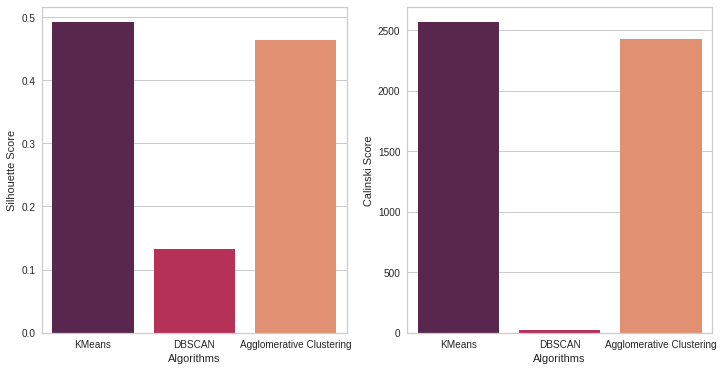

In [144]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.barplot(x = validation['Algorithms'], y = validation['Silhouette Score'], 
              palette = 'rocket')

plt.subplot(1,2,2)
sns.barplot(x = validation_df_cal['Algorithms'], y = validation_df_cal['Calinski Score'], 
              palette = 'rocket')

**Interpretation:**

The best **Clustering Models** is **K-Means Model**.

In [145]:
data_for_kmeans

,Recency,Frequency,Monetary,labels
0,-0.628328,0.510098,0.495986,1
1,-0.634681,-0.023495,-0.575975,1
2,0.165825,0.364573,0.668091,1
3,-0.564795,1.431759,0.939281,2
4,0.905974,-1.187698,-0.848188,0
...,...,...,...,...
1368,1.773189,-0.993664,-0.961450,3
1369,-0.625151,0.995183,1.587870,2
1370,-0.644211,2.159386,2.722749,2
1371,0.664552,-1.090681,-0.966843,0


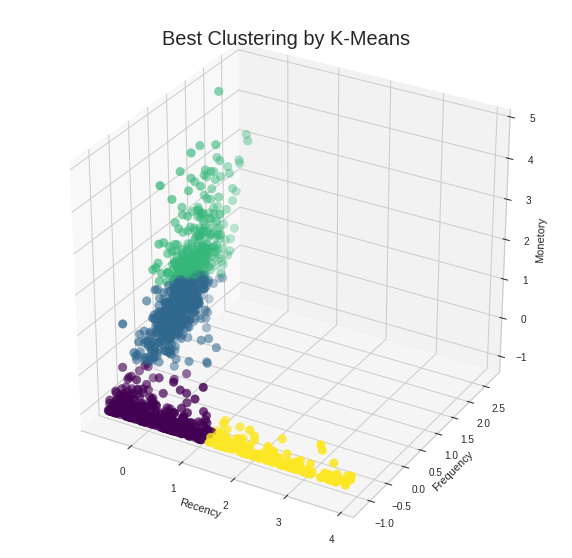

In [146]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(data_for_kmeans["Recency"],data_for_kmeans["Frequency"],data_for_kmeans["Monetary"],
               c = data_for_kmeans['labels'], cmap ="viridis",s = 75) 

plt.title('Best Clustering by K-Means',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

**Open-Ended**

The reason why using multiple models for clustering is to determine precisely whether the customer is properly classified based on the existing data. Errors in clustering will cause errors in business strategy creation. Losing customers is the same as losing the company's trust and sustainability. This will cause the company to suffer huge losses.

**Action**

With segmentation we will provide a stimulus according to customer behavior. If the customer is in the loyal or subscription segment, we will provide a stimulus that will make the customer shop more often. Meanwhile, for customers who are quite frequent but not always, a stimulus is given at a time to attract these customers back to shop with us. And others will be given stimulus quite often but not with a large quantity of promos and only in the form of anglers.